In [1]:
import pandas as pd
import matplotlib.pyplot as pt
from scipy.stats import ttest_ind

In [4]:
BEL_analysis = pd.read_csv("BEL_elia.csv",parse_dates=True,index_col='Timestamp',usecols = ['Timestamp','BEL_im_pow_MW', 'BEL_FRR_pow_MW', 'BEL_FRR_cost_EUR', 'BEL_nett_pow_MW', 'BEL_nett_cost_EUR'])



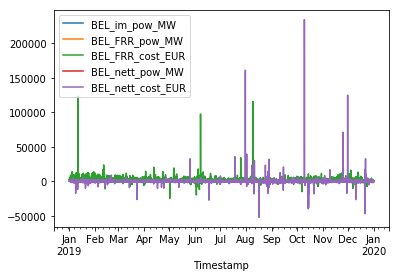

In [5]:
BEL_analysis["2019"].plot()

In [6]:
BEL_before=BEL_analysis["2015-01-01":"2016-12-31"]
BEL_mid=BEL_analysis["2017-01-01":"2019-08-26"]
BEL_after=BEL_analysis["2019-08-27":"2019-12-31"]


## analyse datasets

In [7]:
BEL_before.describe()

BEL_im_pow_MW  BEL_FRR_pow_MW  BEL_FRR_cost_EUR  BEL_nett_pow_MW  \
count   70176.000000    70176.000000      70176.000000     70176.000000   
mean       10.337494       78.640376        859.821958        38.912245   
std       149.012359       69.486455       1707.447660        36.354783   
min     -1044.000000        0.000000     -20131.229200         0.000000   
25%       -76.000000       32.356750        169.323152         8.055000   
50%        12.000000       60.689000        382.993375        29.424000   
75%       100.000000      105.139250        895.100960        59.834000   
max       964.000000      780.400000      68563.216250       183.400000   

       BEL_nett_cost_EUR  
count       70176.000000  
mean           50.536629  
std          3725.000847  
min       -386781.907500  
25%           -54.177987  
50%            11.599220  
75%           253.180979  
max        299936.128440

In [8]:
BEL_mid.describe()

BEL_im_pow_MW  BEL_FRR_pow_MW  BEL_FRR_cost_EUR  BEL_nett_pow_MW  \
count   92928.000000    92928.000000      92928.000000     92928.000000   
mean       70.887483       75.799494        973.204121        47.578669   
std       138.237860       71.192666       2445.942202        37.886994   
min     -1684.000000        0.000000     -24937.465710         0.000000   
25%        12.000000       27.083500        138.095624        16.348000   
50%        64.000000       56.706500        374.055433        40.348000   
75%       140.000000      101.500000        956.296516        71.704000   
max      1600.000000     1371.300000     123299.514500       147.688000   

       BEL_nett_cost_EUR  
count       92928.000000  
mean           69.646183  
std          1946.587434  
min       -201048.000000  
25%          -141.482615  
50%            23.433570  
75%           342.618087  
max        288173.000000

In [9]:
BEL_after.describe()

BEL_im_pow_MW  BEL_FRR_pow_MW  BEL_FRR_cost_EUR  BEL_nett_pow_MW  \
count   12192.000000    12192.000000      12192.000000     12192.000000   
mean      113.757218       74.132452        644.445295        44.076649   
std       101.506869       66.105975       1264.261104        37.819803   
min         0.000000        0.000000     -15045.802985         0.000000   
25%        40.000000       27.062000        121.958676        12.166000   
50%        88.000000       57.237000        275.415354        36.370000   
75%       160.000000       99.484500        730.842609        66.292000   
max      1256.000000      525.966000      16095.526162       145.000000   

       BEL_nett_cost_EUR  
count       12192.000000  
mean          -18.102795  
std          2739.951907  
min        -47185.401692  
25%          -233.144438  
50%             0.000000  
75%           152.831621  
max        233890.386000

## t test and cohens d

### FRR_pow

In [11]:
ttest_ind(BEL_before["BEL_FRR_pow_MW"],BEL_mid["BEL_FRR_pow_MW"],equal_var=False)

Ttest_indResult(statistic=8.088961023543373, pvalue=6.061115175480208e-16)

In [12]:
n1 = len(BEL_before)
n2 = len(BEL_mid)
N = n1 + n2
var1 = BEL_before["BEL_FRR_pow_MW"].var()
var2 = BEL_mid["BEL_FRR_pow_MW"].var()
mean1 = BEL_before["BEL_FRR_pow_MW"].mean()
mean2 = BEL_mid["BEL_FRR_pow_MW"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.04031699371428097
Very small


In [13]:
ttest_ind(BEL_mid["BEL_FRR_pow_MW"],BEL_after["BEL_FRR_pow_MW"],equal_var=False)

Ttest_indResult(statistic=2.5940950539800642, pvalue=0.00949259822275366)

In [14]:
n1 = len(BEL_mid)
n2 = len(BEL_after)
N = n1 + n2
var1 = BEL_mid["BEL_FRR_pow_MW"].var()
var2 = BEL_after["BEL_FRR_pow_MW"].var()
mean1 = BEL_mid["BEL_FRR_pow_MW"].mean()
mean2 = BEL_after["BEL_FRR_pow_MW"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.02360530163642856
Very small


### FRR_costs

In [15]:
ttest_ind(BEL_before["BEL_FRR_cost_EUR"],BEL_mid["BEL_FRR_cost_EUR"],equal_var=False)

Ttest_indResult(statistic=-11.016649689265462, pvalue=3.2507779516967374e-28)

In [16]:
n1 = len(BEL_before)
n2 = len(BEL_mid)
N = n1 + n2
var1 = BEL_before["BEL_FRR_cost_EUR"].var()
var2 = BEL_mid["BEL_FRR_cost_EUR"].var()
mean1 = BEL_before["BEL_FRR_cost_EUR"].mean()
mean2 = BEL_mid["BEL_FRR_cost_EUR"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.05250671398632904
Very small


In [17]:
ttest_ind(BEL_mid["BEL_FRR_cost_EUR"],BEL_after["BEL_FRR_cost_EUR"],equal_var=False)

Ttest_indResult(statistic=23.51410651833735, pvalue=5.208124504124235e-121)

In [18]:
n1 = len(BEL_mid)
n2 = len(BEL_after)
N = n1 + n2
var1 = BEL_mid["BEL_FRR_cost_EUR"].var()
var2 = BEL_after["BEL_FRR_cost_EUR"].var()
mean1 = BEL_mid["BEL_FRR_cost_EUR"].mean()
mean2 = BEL_after["BEL_FRR_cost_EUR"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.14051358412311066
Very small


### nett_pow

In [19]:
ttest_ind(BEL_before["BEL_nett_pow_MW"],BEL_mid["BEL_nett_pow_MW"],equal_var=False)

Ttest_indResult(statistic=-46.80775303791833, pvalue=0.0)

In [20]:
n1 = len(BEL_before)
n2 = len(BEL_mid)
N = n1 + n2
var1 = BEL_before["BEL_nett_pow_MW"].var()
var2 = BEL_mid["BEL_nett_pow_MW"].var()
mean1 = BEL_before["BEL_nett_pow_MW"].mean()
mean2 = BEL_mid["BEL_nett_pow_MW"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.23274638732824107
Small


In [21]:
ttest_ind(BEL_mid["BEL_nett_pow_MW"],BEL_after["BEL_nett_pow_MW"],equal_var=False)

Ttest_indResult(statistic=9.611206160412516, pvalue=8.242592594676732e-22)

In [22]:
n1 = len(BEL_mid)
n2 = len(BEL_after)
N = n1 + n2
var1 = BEL_mid["BEL_nett_pow_MW"].var()
var2 = BEL_after["BEL_nett_pow_MW"].var()
mean1 = BEL_mid["BEL_nett_pow_MW"].mean()
mean2 = BEL_after["BEL_nett_pow_MW"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.09245230106819897
Very small


### nett_cost

In [23]:
ttest_ind(BEL_before["BEL_nett_cost_EUR"],BEL_mid["BEL_nett_cost_EUR"],equal_var=False)

Ttest_indResult(statistic=-1.2373845559844172, pvalue=0.21594728667052907)

In [24]:
n1 = len(BEL_before)
n2 = len(BEL_mid)
N = n1 + n2
var1 = BEL_before["BEL_nett_cost_EUR"].var()
var2 = BEL_mid["BEL_nett_cost_EUR"].var()
mean1 = BEL_before["BEL_nett_cost_EUR"].mean()
mean2 = BEL_mid["BEL_nett_cost_EUR"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.006702462258293304
Negligible


In [25]:
ttest_ind(BEL_mid["BEL_nett_cost_EUR"],BEL_after["BEL_nett_cost_EUR"],equal_var=False)

Ttest_indResult(statistic=3.4246260605197008, pvalue=0.0006174303682781124)

In [26]:
n1 = len(BEL_mid)
n2 = len(BEL_after)
N = n1 + n2
var1 = BEL_mid["BEL_nett_cost_EUR"].var()
var2 = BEL_after["BEL_nett_cost_EUR"].var()
mean1 = BEL_mid["BEL_nett_cost_EUR"].mean()
mean2 = BEL_after["BEL_nett_cost_EUR"].mean()

    
sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
cohenDnd = abs((mean1 - mean2) / sp)
print(cohenDnd)

if cohenDnd < .01:
    print('Negligible')
elif cohenDnd < .20:
    print('Very small')
elif cohenDnd < .50:
    print('Small')
elif cohenDnd < .80:
    print('Medium')
elif cohenDnd < 1.20:
    print('Large')
elif cohenDnd < 2.00:
    print('Very large')
else:
    print('Huge') 

0.04271345386868527
Very small


## zero-crossings

In [27]:
BEL = pd.read_csv("BEL_elia.csv",parse_dates=True,index_col='Timestamp')

In [28]:
BEL_before=BEL["2015-01-01":"2016-12-31"]
BEL_mid=BEL["2017-01-01":"2019-08-26"]
BEL_after=BEL["2019-08-27":"2019-12-31"]

In [29]:
BEL_zc = []
BEL_zc_before= []
BEL_zc_mid= []
BEL_zc_after= []
#BEL_zc['ignore in MW']=[]
#BEL_zc['FRR_pos']=[]
#BEL_zc
for ignore in range(10):
    ignore_mw = ignore * 1
    #BEL_zc['ignore in MW'].append(ignore_mw)
    BEL_zc_before.append((((BEL_before['BEL_mFRR_pow_up_MW']+BEL_before['BEL_aFRR_pow_up_MW'])
                .where((BEL_before['BEL_mFRR_pow_up_MW']+BEL_before['BEL_aFRR_pow_up_MW']) > ignore_mw, 0))*
                ((BEL['BEL_mFRR_pow_down_MW']+BEL['BEL_aFRR_pow_down_MW'])
                .where((BEL_before['BEL_mFRR_pow_down_MW']+BEL_before['BEL_aFRR_pow_down_MW']) > ignore_mw, 0)))
                .value_counts(normalize=True)[0])
    BEL_zc_mid.append((((BEL_mid['BEL_mFRR_pow_up_MW']+BEL_mid['BEL_aFRR_pow_up_MW'])
                .where((BEL_mid['BEL_mFRR_pow_up_MW']+BEL_mid['BEL_aFRR_pow_up_MW']) > ignore_mw, 0))*
                ((BEL_mid['BEL_mFRR_pow_down_MW']+BEL_mid['BEL_aFRR_pow_down_MW'])
                .where((BEL_mid['BEL_mFRR_pow_down_MW']+BEL_mid['BEL_aFRR_pow_down_MW']) > ignore_mw, 0)))
                .value_counts(normalize=True)[0])
    BEL_zc_after.append((((BEL_after['BEL_mFRR_pow_up_MW']+BEL_after['BEL_aFRR_pow_up_MW'])
                .where((BEL_after['BEL_mFRR_pow_up_MW']+BEL_after['BEL_aFRR_pow_up_MW']) > ignore_mw, 0))*
                ((BEL_after['BEL_mFRR_pow_down_MW']+BEL_after['BEL_aFRR_pow_down_MW'])
                .where((BEL_after['BEL_mFRR_pow_down_MW']+BEL_after['BEL_aFRR_pow_down_MW']) > ignore_mw, 0)))
                .value_counts(normalize=True)[0])
    BEL_zc.append((((BEL['BEL_mFRR_pow_up_MW']+BEL['BEL_aFRR_pow_up_MW'])
                .where((BEL['BEL_mFRR_pow_up_MW']+BEL['BEL_aFRR_pow_up_MW']) > ignore_mw, 0))*
                ((BEL['BEL_mFRR_pow_down_MW']+BEL['BEL_aFRR_pow_down_MW'])
                .where((BEL['BEL_mFRR_pow_down_MW']+BEL['BEL_aFRR_pow_down_MW']) > ignore_mw, 0)))
                .value_counts(normalize=True)[0])  
BEL_zc

[0.2978619021540708,
 0.48602934465133263,
 0.5803441036874771,
 0.6390619295363271,
 0.6812648320554947,
 0.714197699890471,
 0.7417853231106243,
 0.7667773366192041,
 0.7872398685651698,
 0.80574571011318]

In [30]:
BEL_zc_before

[0.3178009575923393,
 0.5035482216142271,
 0.5956737346101231,
 0.6500370497036023,
 0.6909342225262198,
 0.7226972184222527,
 0.7489170086639307,
 0.7726858185134519,
 0.7933766529867761,
 0.8117162562699498]

In [31]:
BEL_zc_mid

[0.28602789256198347,
 0.475841511707989,
 0.5704954373278237,
 0.632177599862259,
 0.6752324380165289,
 0.7087852961432507,
 0.7374526515151515,
 0.7634620351239669,
 0.7840693870523416,
 0.8029657369146006]

In [32]:
BEL_zc_after

[0.27329396325459315,
 0.4628444881889764,
 0.5671751968503937,
 0.6283628608923885,
 0.6715879265091863,
 0.7065288713910761,
 0.7337598425196851,
 0.7580380577427821,
 0.7760826771653543,
 0.7925688976377953]